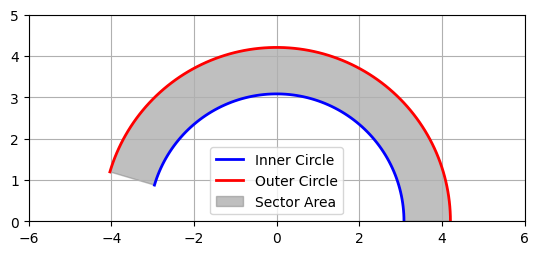

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个新的图形窗口
plt.subplots()

# 定义扇环的参数
center = (0, 0)  # 扇环的中心坐标
inner_radius = 3.082 # 内圆的半径
outer_radius = 4.206# 外圆的半径
start_angle = 0  # 起始角度（以度为单位）
end_angle = 163.49 # 结束角度（以度为单位）

# 创建扇环的路径
theta = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
x_inner = inner_radius * np.cos(theta) + center[0]
y_inner = inner_radius * np.sin(theta) + center[1]
x_outer = outer_radius * np.cos(theta) + center[0]
y_outer = outer_radius * np.sin(theta) + center[1]

# 绘制扇环的内圆和外圆
plt.plot(x_inner, y_inner, color='b', linewidth=2, label='Inner Circle')
plt.plot(x_outer, y_outer, color='r', linewidth=2, label='Outer Circle')

# 填充扇形区域
theta_fill = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
x_fill = np.concatenate((inner_radius * np.cos(theta_fill), 
                         outer_radius * np.cos(theta_fill[::-1])))
y_fill = np.concatenate((inner_radius * np.sin(theta_fill), 
                         outer_radius * np.sin(theta_fill[::-1])))
plt.fill(x_fill, y_fill, color='gray', alpha=0.5, label='Sector Area')

# # 设置绘图区域的范围
plt.xlim(-6, 6)
plt.ylim(0, 5)

# 添加标题和标签
# plt.title("Annular Sector")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.xticks([]),plt.yticks([]) # to hide values on x and y axis

# 添加图例
plt.legend()

# 显示图形
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

# 保存图像为文件（可以选择不同的文件格式，如PNG、JPEG等）
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')  # 设置DPI并保存图像

plt.show()

In [2]:
import cv2
import numpy as np

# 创建一张A4纸大小的空白图像，通常使用300 DPI分辨率
width, height = int(21000), int(29700)  # 将英寸转换为像素
a4_paper = np.ones((height, width, 3), np.uint8) * 255  # 创建一个白色背景图像

# 导入自定义大小的图像并调整大小以适应A4纸
image = cv2.imread('my_plot.png')  # 替换为您的图像文件路径

# 计算目标尺寸
target_width = int(1673)
target_height = int(992)

# 检查目标尺寸是否合法
if target_width > 0 and target_height > 0:
    image = cv2.resize(image, (target_width, target_height))

    # 在A4背景图像上绘制导入的图像，放置在A4中央
    x_offset = (a4_paper.shape[1] - image.shape[1]) // 2
    y_offset = (a4_paper.shape[0] - image.shape[0]) // 2
    a4_paper[y_offset:y_offset + image.shape[0], x_offset:x_offset + image.shape[1]] = image

    
    # 保存生成的图像
    cv2.imwrite('output_image.png', a4_paper)
else:
    print("目标尺寸无效")

只用opencv

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A4
width, height = int(21000), int(29700)
image = np.ones((height, width, 3), dtype=np.uint8)*255

# 定义扇形的参数
center = (5000, 0)  # 扇形的中心坐标
in_radius = 3082 #内圆半径
radius = 4206  # 扇形的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 255, 0)  # 扇形的颜色，这里是绿色
inner_color = (255,255,255)
thickness = -1  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(image, center, (radius, radius), 0, start_angle, end_angle, color, thickness)
cv2.ellipse(image, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness)


# 保存绘制好的图像
cv2.imwrite('fanRing.png', image)
# plt.imshow(image)

# 显示图像
# cv2.imshow('fanRing', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

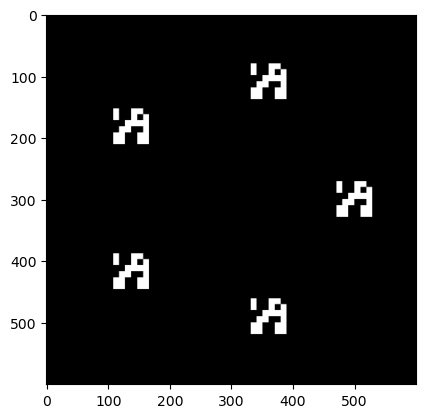

In [9]:
import cv2
import numpy as np

# 创建一个空白的画布
canvas_size = (600, 600, 3)  # 宽、高、通道数（3表示彩色图像）
canvas = np.zeros(canvas_size, dtype=np.uint8)

# 你可以根据需要调整画布大小和通道数

# 定义圆心和半径
center = (canvas.shape[1] // 2, canvas.shape[0] // 2)  # 画布中心点坐标
radius = 200  # 圆环的半径

# 计算每张图片的角度间隔
angle_interval = 360 / 5

# 假设你有一个包含图片文件名的列表，例如：
image_filenames = ['marker1.png', 'marker2.png', 'marker3.png', 'marker4.png', 'marker5.png']


# 在每个角度位置绘制图片
for i in range(5):
    angle = i * angle_interval
    x = int(center[0] + radius * np.cos(np.radians(angle)))
    y = int(center[1] + radius * np.sin(np.radians(angle)))

    # 调整图片大小以适应圆环
    img = cv2.imread(image_filenames[i])
    img = cv2.resize(img, (200, 200))  # 调整为适当的大小
    h, w, _ = img.shape

    # 计算图片在画布上的位置
    start_x = x - w // 2
    end_x = x + w // 2
    start_y = y - h // 2
    end_y = y + h // 2

    # 将图片复制到画布上
    canvas[start_y:end_y, start_x:end_x] = img

plt.imshow(canvas)

# # 显示结果
# cv2.imshow("Circular Image Layout", canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


[ WARN:0@4562.446] global loadsave.cpp:248 findDecoder imread_('[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]'): can't open/read file: check file path/integrity
[ WARN:0@4562.456] global loadsave.cpp:248 findDecoder imread_('[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 

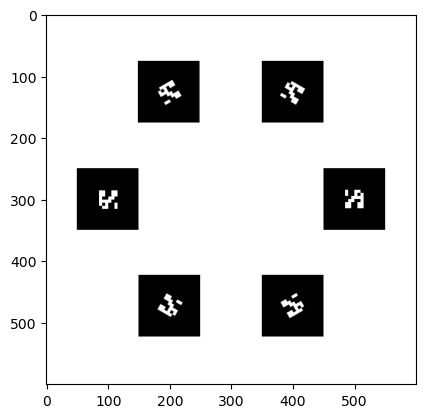

In [30]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

# 定义图片文件夹路径
image_folder = '/home/daic/Desktop/cv_work/markers'

# 获取图片文件夹中的所有文件
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# 创建一个空列表来存储读取的图片
images = []

# 使用循环读取每张图片并存储在列表中
for image_file in image_files:
    image = cv2.imread(image_file)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to read image: {image_file}")

# 图片尺寸和数量
image_width, image_height = 100, 100
num_images = len(images)

# 圆环的半径和中心坐标
radius = 200
center_x, center_y = 300, 300


# 创建一个空白画布
canvas = 255 * np.ones((600, 600, 3), dtype=np.uint8)

# 计算每张图片的角度间隔
angle_step = 360 / num_images


for i in range(num_images):
    angle_deg = i * angle_step
    angle_rad = math.radians(angle_deg)
    x = int(center_x + radius * math.cos(angle_rad)) - image_width // 2
    y = int(center_y + radius * math.sin(angle_rad)) - image_height // 2

    
    aruco_image = cv2.imread(str(images[i]))
    aruco_image = cv2.resize(image, (image_width, image_height))  # 调整为适当的大小

   

    # 计算旋转角度，使图片面向圆心
    rotation_angle_deg = -angle_deg  # 负号用于逆时针旋转
    rotation_matrix = cv2.getRotationMatrix2D((image_width // 2, image_height // 2), rotation_angle_deg, 1)
    rotated_image = cv2.warpAffine(aruco_image, rotation_matrix, (image_width, image_height))

    # 将旋转后的彩色条纹图片放在计算出的位置上
    canvas[y:y + image_height, x:x + image_width] = rotated_image

    plt.imshow(canvas)
# # 显示圆环
# cv2.imshow('Circular Layout with Rotation', canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [29]:
import cv2
import numpy as np

# 读取图片
image = cv2.imread('westbrook.jpg')

# 获取图片的中心点坐标
height, width = image.shape[:2]
center = (width // 2, height // 2)

# 定义旋转矩阵
angle = 45  # 旋转角度
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# 计算旋转后的图像尺寸
cosine = np.abs(rotation_matrix[0, 0])
sine = np.abs(rotation_matrix[0, 1])
new_width = int((height * sine) + (width * cosine))
new_height = int((height * cosine) + (width * sine))

# 调整旋转矩阵以确保图像不被裁剪
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# 进行旋转
rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), flags=cv2.INTER_LINEAR)

# 显示旋转后的图像
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
